## Content

- **Case Study Intro**

- **DBSCAN Intro**
    - Density and Dense Region
    - Min Points and Eps
    - Core point
    - Border point
    - Noise point
    - Density Edge
    - Density Connected Points

- **DBSCAN Algo**

- **Hyperparam tuning**

- **Adv and Disadv of DBSCAN**

- **Implementing DBSCAN**

- **Intro to Anomaly detection**

    - Ditribution based
    - Ellipctic Envelope

## Case Study: Customer Grouping with DBSCAN

In today's lecture, we'll try to segment customers based on 'Wholesale Customers Data'.

**Q. What is meant by customer segmentation?**
- Customer segmentation is the process by which you divide your customers up based on common characteristics – such as demographics or behaviours, so you can market to those customers more effectively.

- Almost all the companies in today's world, one way or other, make use of customer segmentation for marketing.

**Q. But, how would we segment the customers based on some numbers present in the data?**

- So far, we have seen K-Means which is a centroid based algorithm.

- We saw Agglomerative Clustering which is hierarchical system.

- Today we will see an overview (very high level) for 2 more clustering algorithms. The goal for this lecture is not to go into detail about these algorithms but to just get intuitive understanding of how they work, since they are not as popular in the community.

- We'll use these algorithms to do the segmentation of the customers on 'Wholesale Customers Data'.

- First, we will start with DBSCAN which is more of density based; i.e. the clustering should be done on the basis of how dense a neighborhood around a point.

Before jumping in, let's first understand and import the data, and try to visualize it on a plot.

#### **Dataset - Wholesale Customers Data**

The dataset used for this case study contains the following parameters:

1. **Fresh:** annual spending (some monetary unit) on fresh products (Continuous);
2. **Milk:** annual spending (some monetary unit) on milk products (Continuous);
3. **Grocery:** annual spending (some monetary unit) on grocery products (Continuous);
4. **Frozen:** annual spending (some m.u.) on frozen products (Continuous)
5. **Detergentss_Paper:** annual spending (some m.u.) on detergents and paper products (Continuous)
6. **Delicassen:** annual spending (some m.u.) on and delicatessen products (Continuous);
7. **Channel:** customers Channel - (Two possible values: Horeca (Hotel/Restaurant/Cafe) or Retail channel) (Nominal)
8. **Region:** customers Region (Three possible values: Lisnon, Oporto or Other) (Nominal)

In [1]:
!gdown 10ZdMFvfhGeXAa8xR0J00kHIHp9y9m9uL

Downloading...
From: https://drive.google.com/uc?id=10ZdMFvfhGeXAa8xR0J00kHIHp9y9m9uL
To: /content/wholesaledata.csv
100% 15.0k/15.0k [00:00<00:00, 26.9MB/s]


In [2]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (16,12)

In [3]:
df = pd.read_csv('./wholesaledata.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [4]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


- The dataset consists of 440 customers and has 8 attributes for each of these customers.

- No missing values

- Only two variables are **non-continuous (categorical)** in nature: Channel and Region.

- So for easing our computations, we will drop these two categorical features.

In [5]:
# Dropping categorical variables for simplicity
df.drop(["Channel", "Region"], axis = 1, inplace = True)

#### **Visualizing the data in 2D**

Using 2 features:

1. **Grocery:** The customer’s annual spending (in some monetary unit) on grocery products.
2. **Milk:** The customer’s annual spending (in some monetary unit) on milk products.

#### Let's plot two features data now:

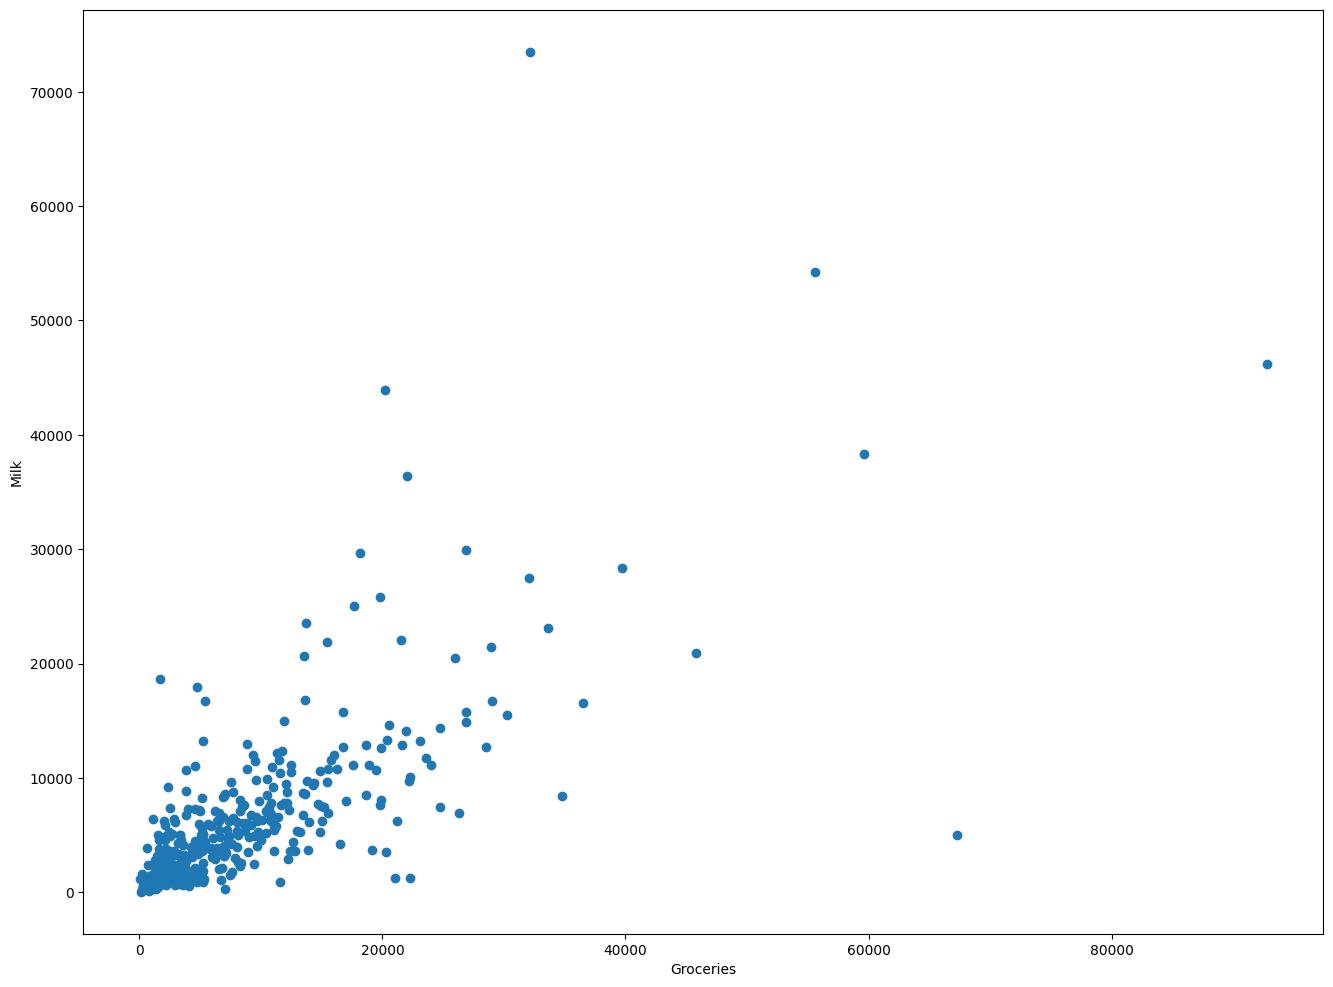

In [6]:
x = df['Grocery']
y = df['Milk']

plt.scatter(x,y)
plt.xlabel("Groceries")
plt.ylabel("Milk")
plt.show()

**Q. Can you point out some problems that the clustering algorithms that we've learned till now might face?**

- We can easily see the data points that are far away from rest of the data points.

- Well, those are our **outlier** data points.

- **K-Means is sensitive to outliers** and will try to cluster the outliers as well.

In [ ]:
df = df[['Grocery', 'Milk']]
std_scaler = StandardScaler().fit(df)
std_df = std_scaler.transform(df)

In [ ]:
from sklearn.cluster import KMeans

k = 2 ## arbitrary value
kmeans = KMeans(n_clusters=k)
y_pred = kmeans.fit_predict(std_df)

In [ ]:
clusters = df.copy()
clusters['label'] = kmeans.labels_
clusters

,Grocery,Milk,label
0,7561,9656,1
1,9568,9810,1
2,7684,8808,1
3,4221,1196,1
4,7198,5410,1
...,...,...,...
435,16027,12051,1
436,764,1431,1
437,30243,15488,0
438,2232,1981,1


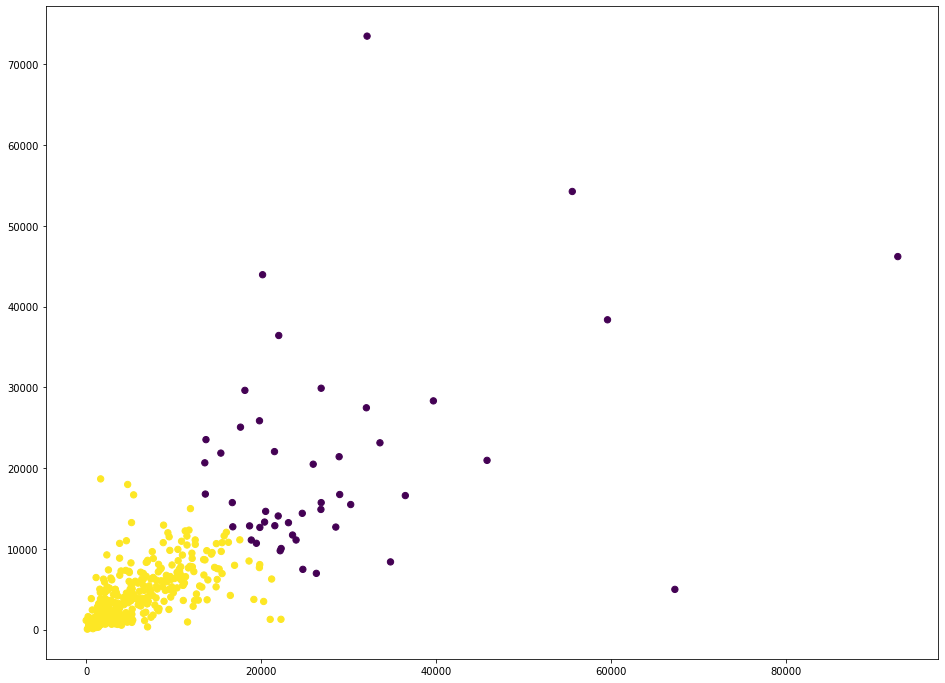

In [ ]:
plt.scatter(clusters['Grocery'], clusters['Milk'], s=40, c=clusters['label'])

**Q. What about Hierarchical Clustering?**

- One can define the optimal number of clustering after the algorithm has converged. This can certainly reduce the affect of outliers on the results.

In [ ]:
from sklearn.cluster import AgglomerativeClustering
agc = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
agc_pred = agc.fit_predict(std_df)
clusters['agc labels'] = agc.labels_

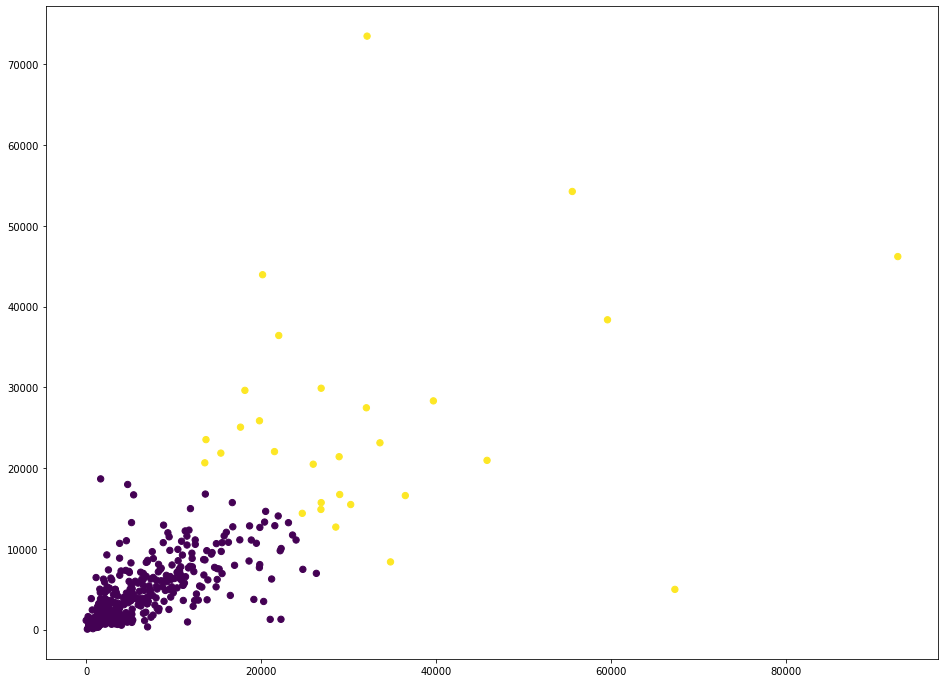

In [ ]:
plt.scatter(clusters['Grocery'], clusters['Milk'], s=40, c=clusters['agc labels'])

**Q. So, why do we need to learn these two new algorithms?**
- If you notice carefully, a whole lot of customers are gruped together near the origin.

- At somewhere around the value of $(Groceris,Milk) = (25'000, 15'000)$, there are some noise points and that is where the customers are getting a little spread.

- Think of them as your premium segment customers from which the company makes a significant amount of sales.

- If we use hierarchical or K-Means clustering, chances are that significant part of these customers will get segment with regular ones (customers who spent less)

Let's see how DBSCAN tackles this problem.



Images of DBSCAN shown in the lecture can be found here: https://cs.wmich.edu/alfuqaha/summer14/cs6530/lectures/ClusteringAnalysis.pdf

Alternative link: https://drive.google.com/file/d/1ok4aGA1AZna3XyodOrLO8DYbZImpI7l9/view?usp=sharing

## **DBSCAN**

- DBSCAN refers to Density-based spatial clustering of application with noise
- DBSCAN works fairly well with large data and is able to handle noise and outliers very efficiently

#### **Key Ideas behind DBSCAN**

To understand the working of DBSCAN, there are some key-ideas that we need to understand. Let's do that in the next couple of minutes

1. Min points
2. Eps (epsilon)
3. core-point
4. border-point
5. noise-point

##### **Density and Dense Region**

As the name suggests that it is **Density-based**, but what does it really mean?

- DBSCAN uses a concept of density, which can be defined as;

  - at a certain point $P$, density at point $P$ is the number of points within a hypersphere centered at $P$ with radius of $epsilon$

<img src='https://drive.google.com/uc?id=1XLqS1Bl7hgGm5ua9WN4z_ZxaJRjLFIKE'>


> Q. **We have defined what density is, but which region can be chosen as a dense region?**

To answer this, consider any region around point $P$ within $eps$ radius, if there are more datapoints than $minpts$, we call the region as a **Dense** region.

For example, let's say we have $eps = 1$ and $minpts = 10$
- Consider two points $P_{1}$ and $P_{2}$, both with a radius of $eps$
- Suppose there are 20 points around point $P_{1}$, and only 6 points around point $P_{2}$ within the radius of $eps$, then we say the region around point $P_{1}$ as dense and region around point $P_{2}$ as non-dense

<img src='https://drive.google.com/uc?id=10hEEKCIKOyBvlPS8xztJol8ZqLEzBQIO'>


##### **Min Points and Epsilon**

> Q. **So, what exactly are '$minpts$' and '$eps$'?**

- **$minpts$** are the minimum number of points that we need in a hypershpere around point $P$ with the radius of **$eps$** for considering the region as **Dense** region.

- $minpts$ acts like a certain threshold and $eps$ is the radius of the hypershpere

##### **Core point**


This leads us to discuss next key-ideas. We'll start with $core-point$. So, what is a $core-point$?

- If a point $P$ has points $\geq minpts$ within the radius of $eps$, then $P$ is a core point.
- This also implies that point $P$ has a dense region around it

<img src='https://drive.google.com/uc?id=1UhVDrULt14o1ThZpo3xBgU5mmEcCSFJD'>

##### Q. Border Point


Next, we'll dicuss **border-point**. So, what is a border point?

- A point $P$ can be defined as a border-point if:
  1. $P$ is not a core point
  2. Point $P$ lies in the neighborhood of point $Q$ such that point $Q$ is a core-point

> Q. what is **neighborhood**?
- A point $P$ is said to be in the neigborhood of point $Q$, if distance between point $P$ and $Q$ is less than $eps$ value; i.e. $dist(P,Q) \leq eps$

<img src='https://drive.google.com/uc?id=1l7GB8yO6Jr0vnzOEigKsiJDj7qi05TFe'>

##### **Noise Point**

One more type of point is **Noise Point**.
- It is a point which is neither a core point nor border point
- Suppose around core point $P$, a border point $Q$, and a point $R$ which is in a non-dense region, the point $R$ is said to be a noise point

<img src='https://drive.google.com/uc?id=1wYV4ucA_rmD-7LwsUHhXjXsus7DDp4Mr'>

***

**NOTE:** One thing to understand is that, when using DBSCAN, we fix two things:
1. Min Points
2. Epsilon.

By fixing these hyperpameters, we get core points, border points and noise points as well

Want to see how DBSCAN labels datapoints into core points, border points and noise points? Here you go:

<img src='https://drive.google.com/uc?id=1LtCcQRxe_mjnAmJw0JJNGDDZITIYdugm'>

Observe how well DBSCAN can differentiate between core points, border points and border points. This is exactly what we wanted for segmenting customers.

Before moving to the working of DBSCAN, let's understand two more terms:
1. Density Edge
2. Density Connecteed points

##### **Density Edge**
- If we draw a line from one point (vertex) to another point of our dataset, then it is known as an edge

So, what is a density edge?

- If points $P$ and $Q$ are two core points and the distance between point $P$ and $Q$ is less than or equal to $eps$ value, then an edge between point $P$ and $Q$ is known as a **density edge**

<img src='https://drive.google.com/uc?id=114O2mtGVM83j0hZgfELOmTR3cnKbCyND'>

##### **Density Connected Points**

- Point $P$ and $Q$ can be said as density connected points;
  - if both points are core points
  -  if there exists other density edges connecting point $P$ and $Q$

- Imagine we have two core points, point $P$ and $Q$ and there are other core points connecting point $P$ with point $Q$; say $P_{1}, P_{2},....P_{n}$, where the distance between each point $P_{1}, P_{2},....P_{n}$ is less than $eps$

- Then point $P$ and point $Q$ are said to be density connected points

<img src='https://drive.google.com/uc?id=1L6ituwu7wvcOx22DmrBTEgSIoHSsobSF'>

> **Q. If the distance between point $P$ and $Q$ is greater than $eps$, are they still density connected points?**

Yes! One thing to note here is that the disatnce between point $P$ and $Q$ can be more, less or equal to the value of $eps$

***

## **DBSCAN Algorithm**

So, how does DBSCAN uses all this information, and makes clusters out of datapoints? Lets see how DBSCAN Algorithm works



#### **Step 1**

- For each point $x_{i}$ that belongs to the dataset $D$, label it as either core point, border point, or noise point.

How can this be done?
- We can do this by using the concept of **Range Queries** which is popularly used in databases community
- We define this query as: $RangeQuery(D, x_{i}, eps)$
- The query tells how many points in the dataset $D$ are withing the radius of $eps$

- Time complexity of this step would be $O(n * logN)$
<img src='https://drive.google.com/uc?id=18qdGD7UnCkEEziHQDdgSBwJR9JunrP5x'>

#### **Step 2**

- Remove all the noise points from the dataset
- Time complexity of this step would be $O(n)$

This is basically a noise removal step


#### **Step 3**

This step is where things get really interesting. Let's see the 3$^{rd}$ step.

- For each core point $P$ that is not yet assigned to any clustered:
  - create a new cluster with point $P$
  - Add all points that are density connected to point $P$, to the $P$'s cluster

Let's understand this with an example

- Consider a core point $P$ and there are three core points $P_{1}, P_{2}$ and $P_{1}$ which are density connected.

- Then, we group all the three points in the cluster of point $P$

- Time complexity of this step would be $O(n * logN)$

<img src='https://drive.google.com/uc?id=17i1vcBN7q5rpNxOHDyGStmfrelx9Yy4D'>

So, we've dealt with noise points and core points. What about border points?
Lets see how DBSCAN deals with border points

#### **Step 4**

- For each border point, we assign it to the nearest core points' cluster.

 - For example, if we're having a cluster having core points $P_{1}, P_{2}.... P_{9}$, and a border point P_{10} which is near the cluster.

  -
  We merge border point P_{10}, into the cluster of core points $P_{1}, P_{2}.... P_{9}$

- Time complexity of this step would be $O(n) * logN$
***



> Play around with Min_Pts and Eps value with different distributions.

Link: https://www.naftaliharris.com/blog/visualizing-dbscan-clustering/

**Q. So, we studied how DBSCAN works. What now? One thing that you can question about is that what should be the ideal values of $minpts$ and $eps$?**

 Let's find that out

## **Adjusting Min Points**

1.  So there are some rules of thumb that people have made over the past years, which typically works well. They are:
  - value of $minpts$ should be greater than or equal to $d+1$; where $d$ is dimensionality of the data
  - lot of libraries use the value of $minpts$ approximately equal to $2 * d$

The points mentioned above are typically rules of thumb and these are used because they tend to work fairly good in most of the cases

2. Given an epsilon value, if the dataset is noisy, we pick larger $minpts$

<img src='https://drive.google.com/uc?id=1GG8CsjKWMsfonj35rfxUbpHpc-L6f9QF'>

## **Adjusting Epsilon Value**

> Q. **Now**, how to tune $eps$ value?

Let's assume we've fixed the value of $minpts = 4$.

Then, we'll perfrom a bunch of steps:

 - Step 1:
  - for every point $x_{i}$ in dataset, we compute a distance $d_{i}$.
  - $d_{i}$ refers to the distance from $x_{i}$ to $x_{i}$'s 4$^{th}$ nearest neighbor (because we've set $minpts$ = 4)

- Step 2:
  - Sort the values of $d_{i}$'s and plot them. You'll notice that the distance will increase graudally and then suddenlly, at a certain point, the value of distance will get boosted
  - So, the index at which the value of $d_{i}$ distance got boosted will be used as the value of $eps$
  - The indices having higher values of $d_{i}$'s will be outliers

<img src='https://drive.google.com/uc?id=1kkZ5b-CQCqUt6PyCTwIHap7EiDNZPfM1'>
<img src='https://drive.google.com/uc?id=1p2h31o66gwI63omdbqulKl2rht8K6z3T'>

***

## **Advantages & Disadvantages of DBSCAN**

#### **When does DBSCAN work well?**

- It’s resistant to noise
- Can handle clusters of different shapes and sizes.

<img src='https://drive.google.com/uc?id=1hq2IUn81_PVwKcFlrw070KrrvH_4NksC'>

- It doesn’t require one to specify the number of clusters a priori.
- It requires only two parameters: MinPts and Epsilon.
- It is designed for use with databases as it’s created by the database
community.



#### Limitations of DBSCAN:

- Even a small change in the hyperparameters, we can get a completely different type of clusters. So, it’s quite sensitive to the choice of hyperparameters.

<img src='https://drive.google.com/uc?id=1fRqrU4-9tdsDI3p0FcOK70q2Iyf39za6'>

- Cannot handle varying densities and data with higher dimensions.

<img src='https://drive.google.com/uc?id=1v_Xy3V-wzpYk9dKjnxtpTBWb86nlDuS0'>

***

## DBSCAN Implementation

- The beauty of using DBSCAN is that it can separate outliers (noise points) as well as it can perform clustering (core and border points).

- In this case study, we'll see an example of how DBSCAN can perform clustering in the presense of outliers in data.

#### **How do we do Customer Grouping (Segmentation) if our customers are arbitrarily distributed with outliers in the data?**

- That is, some customers (data points) act as outliers in the data.

- In order to understand this, we'll use a Wholesale Customer Data.



#### **Goal**
- For our case, with DBSCAN, we want to identify this main cluster of customers.
- But we also want to flag customers with more unusual annual purchasing habits.

#### **Scaling the Features**

- Because the values of the data are in the thousands, we are going to normalize each attribute by scaling it to 0 mean and unit variance.
- This helps to keep the inter-relationships between the features intact so that a small change in one feature would reflect in the other.

In [7]:
df = df[['Grocery', 'Milk']]
std_scaler = StandardScaler().fit(df)
std_df = std_scaler.transform(df)

#### **Fit and Transform using DBSCAN**

In [8]:
# https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html
dbsc = DBSCAN(eps = .5, min_samples = 15).fit(std_df)

In [9]:
#"Noisy samples are given the label -1." --> Reference
labels = dbsc.labels_
labels

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0, -1,  0, -1,  0,
        0,  0,  0,  0,  0, -1,  0,  0,  0,  0, -1,  0,  0,  0, -1,  0,  0,
        0,  0,  0, -1,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,
       -1, -1,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,
        0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0, -1,  0,  0,  0,  0,
        0,  0,  0,  0,  0

In [10]:
out_df = df.copy()
out_df['label'] = dbsc.labels_

In [11]:
out_df['label'].value_counts()

 0    404
-1     36
Name: label, dtype: int64

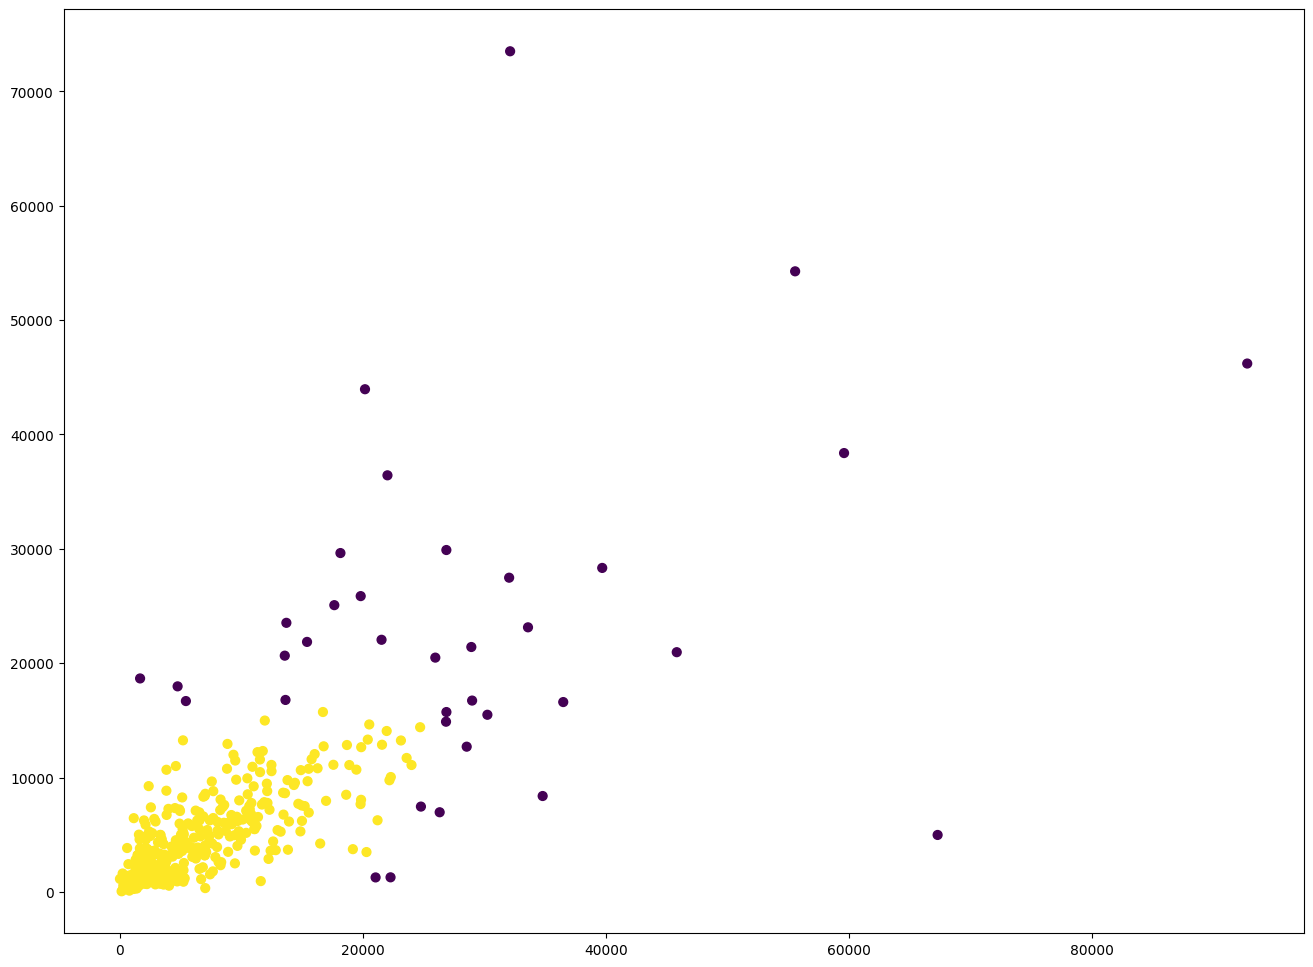

In [12]:
plt.scatter(out_df['Grocery'], out_df['Milk'], s=40, c=out_df['label'])

#### **What insights can we draw from here?**

- Outliers are easily detected using DBSCAN, which can either be the premium segment customers, or they can just be customers with abnormal purchases.

- Most of the customers share the same behaviour (404 out of 440).

#### **Comparing with K-Means**

Let's now compare the results with K-Means' result

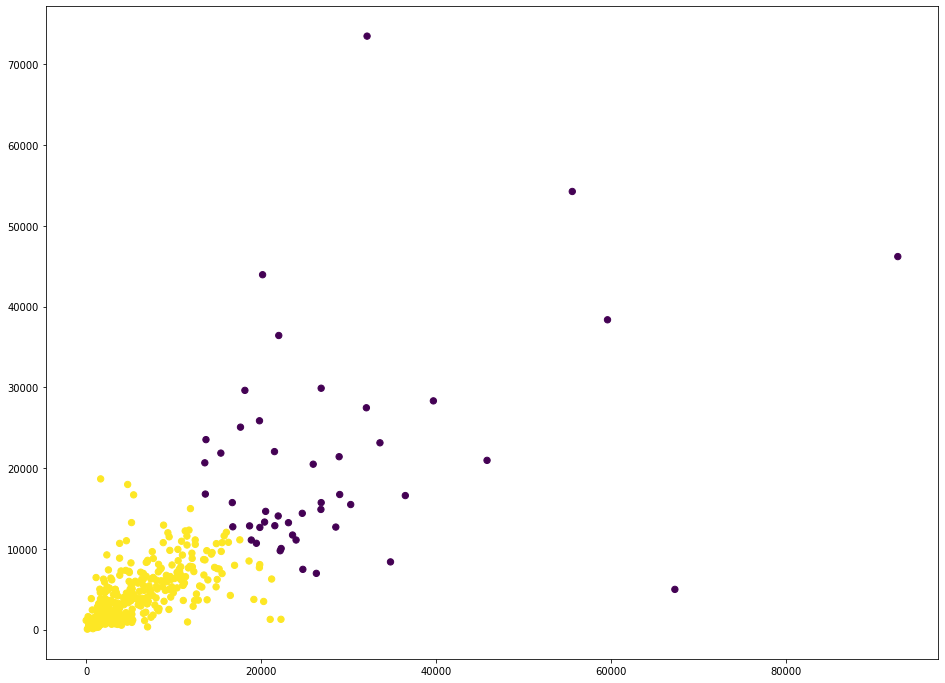

In [ ]:
plt.scatter(clusters['Grocery'], clusters['Milk'], s=40, c=clusters['label'])

- As we can see, **K-Means formed 2 clusters with all the outliers included in one of the clusters.** Finding outliers or noise with K-Means is generally not possible because every point is grouped into a cluster.

- Whereas, **DBSCAN identified and separated out the outlier points**.

## **Introduction to Anomaly/Novelty/Outlier Detection**

**What is an Anomaly?**

- Anomaly is nothing but synonymous of an **outlier**. These terms are often interchanged, and maybe called as **Novelty** depending on the context.

**Q. What's the difference?**

- **Anomaly** means something which is not a part of the normal behaviour
- **Novelty** means something unique, or something that you haven't seen it before(novel)

## **Introducing Business Case**

- Recall your Feature Engineering Classes back in ML-1 where you worked on Cars-24 Dataset.

- Now, you're aware that automobile industry is making a tranisition from **fuel (pertrol/diesel) based cars** to **Electric Cars (EVs)** because of high mileage given by EVs and other environmental concerns.

- As they are new in the industry, number of EVs is significantly smaller than the fuel-based cars.

- For used cars, one of the most important features that a buyer cares about is the mileage. We extracted two features namely '**Mileage**' and '**Price**' from the revised and newer data.

- We are using only these two features because these are the two most important things that buyer really cares about when purchasing a used car. In addition, for visual purposes, 2D data is easy to visualise which can help in understanding the algorithms that we are going to study in this lecture.

- Our task is to identify any novelties/anomalies/outliers that might be present in the data. Let's have a look at the data.

In [ ]:
!gdown 1c6cjIULb3-fjyaVITdui_AFcKMz_lxlg



Downloading...
From: https://drive.google.com/uc?id=1c6cjIULb3-fjyaVITdui_AFcKMz_lxlg
To: /content/AnomalyDetection.csv
100% 33.0k/33.0k [00:00<00:00, 61.9MB/s]


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (12,8)

In [ ]:
df = pd.read_csv('/content/Data: AnomalyDetection.csv')
df.head()

,Mileage,Price
0,54.282388,67.967708
1,17.331911,70.023637
2,36.548113,68.080455
3,42.567541,71.058755
4,5.608853,57.822432


In [ ]:
df.describe()

,Mileage,Price
count,908.000000,908.000000
mean,45.869736,77.555036
std,30.598219,19.275677
min,1.398964,20.000000
25%,25.415487,64.435773
50%,34.599453,73.550501
75%,49.862529,88.939217
max,128.604249,141.201890


- Notice, something strange here?

- Look at the **Min** and **Max** values for both the features.

- Lets plot this data on a scatterplot.

Text(0, 0.5, 'Price')

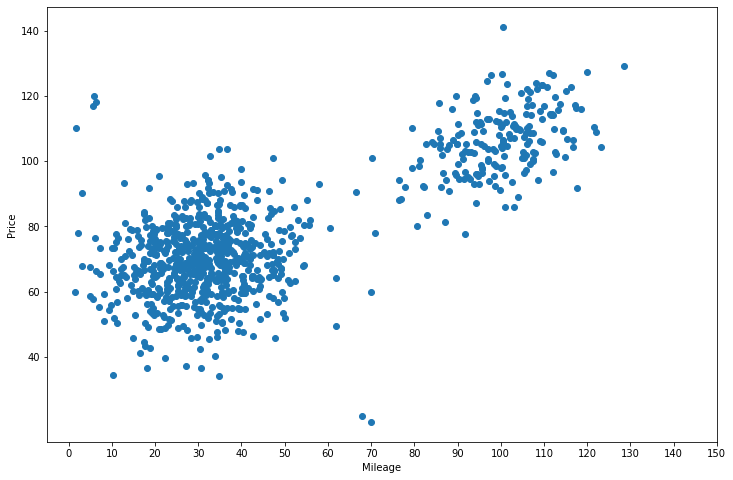

In [ ]:
plt.scatter(df.Mileage, df.Price)
plt.yticks(np.arange(40,160,20))
plt.xticks(np.arange(0,160,10))
plt.xlabel('Mileage')
plt.ylabel('Price')